## **Group-7**

- Wajd Alturki
- Lama Alzahrani
- Mashael Alhussan
- Zarah Shibli



<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_02/02_assignment_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# STARTER CODE - RUN THIS CELL - DO NOT CHANGE
!pip install category_encoders
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, accuracy_score, recall_score, precision_score
df_r = sns.load_dataset("tips").dropna()
df_c = sns.load_dataset("titanic").dropna()
model_r = LinearRegression()
model_c = LogisticRegression()
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(df_r.drop("total_bill", axis=1), df_r["total_bill"])
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(df_c.drop(["survived", "alive", "adult_male"], axis=1), df_c["survived"])
pipe_r = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LinearRegression()).fit(x_train_r, y_train_r)
pipe_c = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LogisticRegression()).fit(x_train_c, y_train_c)
y_pred_r = pipe_r.predict(x_test_r)
y_pred_c = pipe_c.predict(x_test_c)

In [ ]:
# to change text style 
class style:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Weekend Project 10

For this weekend project you will will create 2 heuristic models.
- 1 for the Titanic data (Classification)
  - Predict whether a person will survive or not survive.
- 1 for the Tips dataset (Regression)
  - Predict the total bill for each customer

You do not have to include all the columns in your feature set. 

## Steps to follow for training and testing your model:

1. Split your dataset to train and test.

    - This is a general split "no need to identify the traget and the feature sets. <br /> <br />
1. Use the training to build and tune "adjust" your heuristic model. 
    - This is the dataset the you with EDA to come up with a algorthim for your model.
       <br /> <br /> **Note: The test set should be completely hidden to you at this point.** <br /> <br />
    - The adjustment happens by chaning the condition inside your function "if statements and otherwise".
    
    - Once you are happy with the performance of you heuristic model, then you can test it. <br /> <br />

1. Test your HM using the test split from your dataset. 
1. Report the baseline model for each HR.
  - Classification (Majority Class)
  - Regression (Mean of target)
1. Compare your model with the Logistic Regression (Titanic) and Linear Regression (Tips)

**Note:** You do not need to beat the accuracy of the models, but you are encouraged to try your best.

**Note:** You do not have to create your own cost functions. Your will use the Scikit-learn cost functions to evaluate your model.

---

#### Resources
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
- [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- [Residual Sum of Squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)
- [Precision, Recall, Accuracy](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Scikit-Learn](https://scikit-learn.org/stable/index.html)

# Heuristic Model for Tips Dataset

#### Regression Cost Functions

- Use `y_test_r` as your true labels
- Use `y_pred_r` as your predicted labels

### **Exploratory Data Analysis (EDA)**

In [ ]:
df_train_r = x_train_r.copy() # make a copy from x_train data
df_train_r['total_bill'] = y_train_r # add y_train as column in the dataset

# convert 'total bill' and 'tip' to int, to make visualization plot simple and easy to read
df_train_r['total_bill'] = df_train_r['total_bill'].astype('int') 
df_train_r['tip'] = df_train_r['tip'].astype('int')

df_train_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 160 to 214
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tip         183 non-null    int64   
 1   sex         183 non-null    category
 2   smoker      183 non-null    category
 3   day         183 non-null    category
 4   time        183 non-null    category
 5   size        183 non-null    int64   
 6   total_bill  183 non-null    int64   
dtypes: category(4), int64(3)
memory usage: 6.9 KB


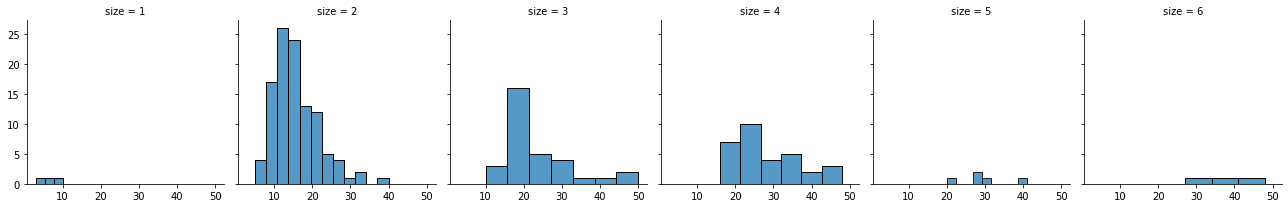

In [ ]:
# plot the distribuaation of the total bill based on size 
sns.FacetGrid(df_train_r, col='size').map_dataframe(sns.histplot, x="total_bill");

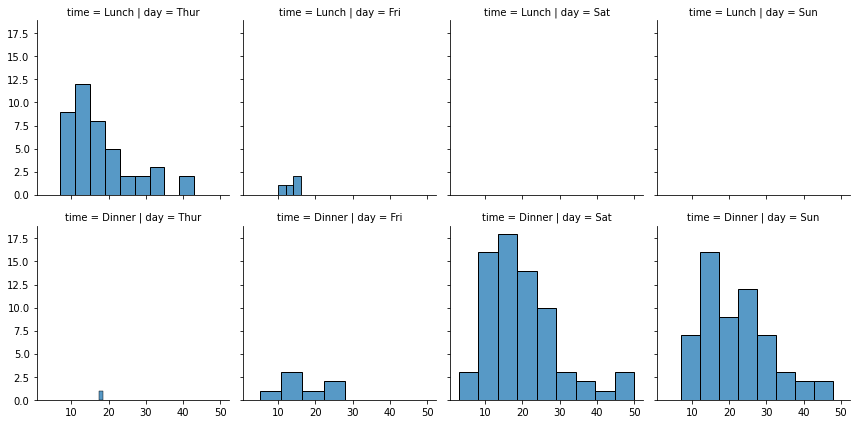

In [ ]:
# plot the distribuaation of the total bill based on time and day
sns.FacetGrid(df_train_r, row="time", col='day').map_dataframe(sns.histplot, x="total_bill");

### **2. Use the training to build and tune "adjust" your heuristic model.**

In [ ]:
# Build your Heuristic model here

def Heuristic(row):
  """
  This function to predict total bill:
  The mean of total bill for samples with same day and time and size


  Input:
    row: data frame contains one row

  Output:
    bill: the prediction of total bill
  """

  # filter data based on the condations, select the matched rows with current row values
  #  then group data by size
  data = df_train_r[(df_train_r['day']== row['day']) & (df_train_r['time']== row['time'])].groupby('size')

  # check if the 'size' of the current row exiting in the grouped data or not 
  if (row['size'] in (data.mean().index)):
     # return the mean of toal bill for row's size
    bill = data.mean().total_bill[row['size']]
  else:
    # return the mean of total bill
    bill = df_train_r.total_bill.mean()
  return bill


In [ ]:
# apply function on all rows in train data
y_pred_r_h_train = [Heuristic(x_train_r.iloc[i]) for i in range(len(x_train_r)) ]

print("Cost functions for Heuristic Model - Training data\n")
print("MSE: ", mean_squared_error(y_train_r, y_pred_r_h_train))
print("MAE: ",mean_absolute_error(y_train_r, y_pred_r_h_train))
print("RMSE: ",mean_squared_error(y_train_r, y_pred_r_h_train, squared=False))

Cost functions for Heuristic Model - Training data

MSE:  47.345023226024814
MAE:  5.099553766639965
RMSE:  6.880771993463002


### **3.Test your HM using the test split from your dataset.**

In [ ]:
# apply function on all rows in test data
y_pred_r_h = [Heuristic(x_test_r.iloc[i]) for i in range(len(x_test_r)) ]

### **4. Report the baseline model for each HR.**

In [ ]:
# Report your baseline model here (Mean of target)
baseline_r = np.full(len(y_test_r), y_train_r.mean()) 
print("Baseline value: ",y_train_r.mean())

Baseline value:  20.108251366120232


### **5. Compare your model with the Linear Regression (Tips)**

In [ ]:
# cost functions for Heuristic Model 
print("-----------------------------------------------")
print(style.BOLD+"Cost functions for Heuristic Model "+style.END)
print("MSE: ", mean_squared_error(y_test_r, y_pred_r_h))
print("MAE: ",mean_absolute_error(y_test_r, y_pred_r_h))
print("RMSE: ",mean_squared_error(y_test_r, y_pred_r_h, squared=False))


# cost functions for Baseline Model
print("-----------------------------------------------")
print('')
print(style.BOLD+"Cost functions for Baseline"+style.END)
print("MSE: ", mean_squared_error(y_test_r, baseline_r))
print("MAE: ",mean_absolute_error(y_test_r, baseline_r))
print("RMSE: ",mean_squared_error(y_test_r, baseline_r, squared=False))


# Cost Functions for the Linear Regression (Tips)
print("-----------------------------------------------")
print('')
print(style.BOLD+"Cost functions for Linear Regression"+style.END)
print("MSE: ", mean_squared_error(y_test_r, y_pred_r))
print("MAE: ",mean_absolute_error(y_test_r, y_pred_r))
print("RMSE: ",mean_squared_error(y_test_r, y_pred_r, squared=False))


-----------------------------------------------
Cost functions for Heuristic Model 
MSE:  50.061613202146034
MAE:  5.3734650929891545
RMSE:  7.07542318184192
-----------------------------------------------

Cost functions for Baseline
MSE:  60.774820929260386
MAE:  6.356012720594827
RMSE:  7.795820734807874
-----------------------------------------------

Cost functions for Linear Regression
MSE:  25.19134187192932
MAE:  3.781842159680995
RMSE:  5.01909771492141


# Heuristic Model for Titanic Dataset

#### Classification Cost Functions

- Use `y_test_c` as your true labels
- Use `y_pred_c` as your predicted labels

### EDA

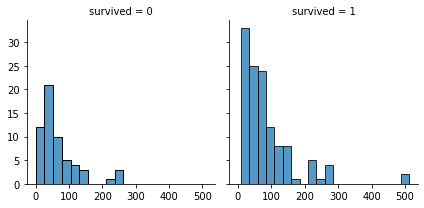

In [ ]:
sns.FacetGrid(df_c, col="survived").map_dataframe(sns.histplot, x="fare");

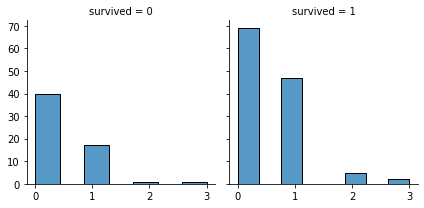

In [ ]:
sns.FacetGrid(df_c, col="survived").map_dataframe(sns.histplot, x="sibsp");

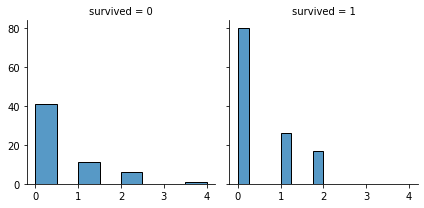

In [ ]:
sns.FacetGrid(df_c, col="survived").map_dataframe(sns.histplot, x="parch");

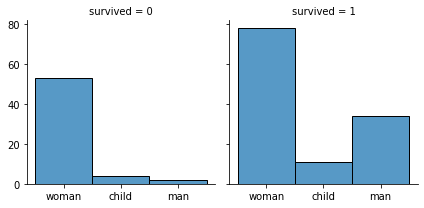

In [ ]:
sns.FacetGrid(df_c, col="survived").map_dataframe(sns.histplot, x="who");

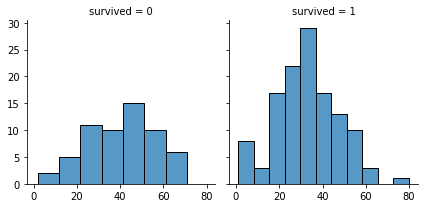

In [ ]:
sns.FacetGrid(df_c, col="survived").map_dataframe(sns.histplot, x="age");

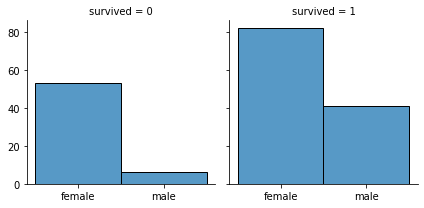

In [ ]:
sns.FacetGrid(df_c, col="survived").map_dataframe(sns.histplot, x="sex");

### **2. Use the training to build and tune "adjust" your heuristic model.**

In [ ]:
# Build your Heuristic model here

def heuristic_titanic(df):
  """
  This function to predict if survived or not:


  Input:
    dt: data frame contains all records

  Output:
    preds: the prediction of survived
  """
  preds = []
  
  for x in range(len(df)):
      condation_1 = df.iloc[x]['age'] < 50 
      condation_2 = df.iloc[x]['who'] == 'woman'
      condation_3 = df.iloc[x]['fare'] <300 
      condation_4 = df.iloc[x]['sex'] == 'female'

      if condation_1  & condation_3 & condation_4:
          preds.append(True)
      else:
          preds.append(False)
  return preds


In [ ]:
# return the prediction for train 
y_pred_c_h_train = heuristic_titanic(x_train_c)

print("-----------------------------------------------")
print(style.BOLD+"Cost functions for Heuristic Model - Train"+style.END)
print("Recall Score: ",recall_score(y_train_c, y_pred_c_h_train))
print("Precision Score: ",precision_score(y_train_c, y_pred_c_h_train))
print("Accuracy Score: ",accuracy_score(y_train_c, y_pred_c_h_train))

-----------------------------------------------
Cost functions for Heuristic Model - Train
Recall Score:  0.5714285714285714
Precision Score:  0.9285714285714286
Accuracy Score:  0.6838235294117647


### **3.Test your HM using the test split from your dataset.**

In [ ]:
# return the prediction for test 
y_pred_c_h = heuristic_titanic(x_test_c)

### **4. Report the baseline model for each HR.**

In [ ]:
# Report your baseline model here (Majority Class)
baseline_c_majority = y_train_c.value_counts(normalize=True).index[0]
baseline_c = np.full(len(y_test_c), baseline_c_majority )  # fill this value by baseline_c_majority with length of test data  :(y_test_c)
print("Baseline: ",baseline_c_majority)

Baseline:  1


### **5. Compare your model with the Logistic Regression (Titanic)**

In [ ]:
# Cost Functions for Heuristic Model
print("-----------------------------------------------")
print('')
print(style.BOLD+"Cost functions for Heuristic Model"+style.END)
print("Recall Score: ",recall_score(y_test_c, y_pred_c_h))
print("Precision Score: ",precision_score(y_test_c, y_pred_c_h))
print("Accuracy Score: ",accuracy_score(y_test_c, y_pred_c_h))


# Cost Functions for Baseline Model
print("-----------------------------------------------")
print('')
print(style.BOLD+"Cost functions for Baseline"+style.END)
print("Recall Score: ",recall_score(y_test_c, baseline_c))
print("Precision Score: ",precision_score(y_test_c, baseline_c))
print("Accuracy Score: ",accuracy_score(y_test_c, baseline_c))


# Cost Functions for Logistic Regression (Titanic)
print("-----------------------------------------------")
print('')
print(style.BOLD+"Cost functions for Logistic Regression (Titanic)"+style.END)
print("Recall Score: ",recall_score(y_test_c, y_pred_c))
print("Precision Score: ",precision_score(y_test_c, y_pred_c))
print("Accuracy Score: ",accuracy_score(y_test_c, y_pred_c))


-----------------------------------------------

Cost functions for Heuristic Model
Recall Score:  0.6
Precision Score:  0.9
Accuracy Score:  0.6956521739130435
-----------------------------------------------

Cost functions for Baseline
Recall Score:  1.0
Precision Score:  0.6521739130434783
Accuracy Score:  0.6521739130434783
-----------------------------------------------

Cost functions for Logistic Regression (Titanic)
Recall Score:  0.8
Precision Score:  0.8275862068965517
Accuracy Score:  0.7608695652173914
